**Clustering with Iris data**

In [1]:
# Load libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

In [2]:
# Load data
iris = datasets.load_iris()
data_in = iris.data

In [3]:
# Standarize features
scaler = StandardScaler()
# Fit to data, then transform it
data_in_std = scaler.fit_transform(data_in)

In [4]:
# Choose the best clusters number for kmeans
def optimal_number_of_clusters(dataset):
    nc = range(1, 20)
    kmeans = [KMeans(n_clusters=i) for i in nc]
    score = [kmeans[i].fit(dataset).score(dataset) for i in range(len(kmeans))]
    plt.plot(nc, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.show()

In [5]:
# Show datapoints and clusters
def show_datapoints_and_clusters(model, ndarray):
    plt.scatter(ndarray[:, 0], ndarray[:, 1], label='Datapoints')
    plt.scatter(model.cluster_centers_[:, 0],
                model.cluster_centers_[:, 1],
                label='Clusters')
    plt.legend()
    plt.show()

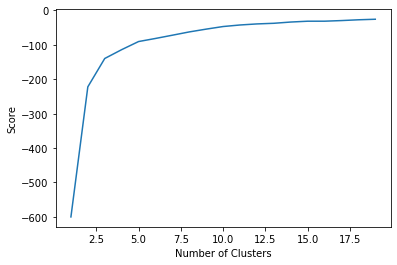

In [6]:
optimal_number_of_clusters(data_in_std)

In [7]:
cluster_kmeans = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
model_kmeans = cluster_kmeans.fit(data_in_std)

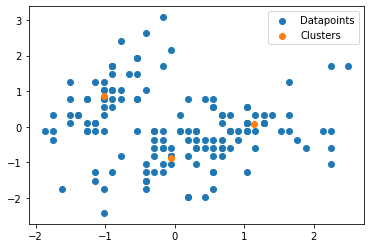

In [8]:
show_datapoints_and_clusters(model_kmeans, data_in_std)

In [9]:
# Show Each Observation’s Cluster Membership as DataFrame
data_in_std_df = pd.DataFrame(data_in_std)
data_in_std_df['cluster'] = model_kmeans.labels_

In [10]:
# View cluster centers
model_kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [11]:
# Create new observation
new_observation_1 = [[0.8, 0.8, 0.8, 0.8]]
new_observation_2 = [[-0.8, 0.8, -0.8, 0.8]]

In [12]:
model_kmeans.predict(new_observation_1), model_kmeans.predict(new_observation_2)

(array([0]), array([1]))

**Mini-Batch k-Means Clustering**

MiniBatchKMeans works similarly to KMeans, with one significance difference: **the batch_size parameter**.
<br>Batch_size controls the number of randomly selected observations in each batch.
<br>The larger the the size of the batch, the more computationally costly the training process.

In [13]:
cluster_minibatch_kmeans = MiniBatchKMeans(n_clusters=3,
                                           random_state=0,
                                           batch_size=100)
model_minibatch_kmeans = cluster_minibatch_kmeans.fit(data_in_std)

**Meanshift Clustering**

MeanShift has two important parameters we should be aware of. 
- First, **bandwidth sets** radius of the area (i.e. kernel) an observation uses to determine the direction to shift. In our analogy, bandwidth was how far a person could see through the fog. We can set this parameter manually, however by default a reasonable bandwidth is estimated automatically (with a significant increase in computational cost). 
- Second, sometimes in meanshift there are no other observations within an observation’s kernel. That is, a person on our football cannot see a single other person. By default, MeanShift assigns all these “orphan” observations to the kernel of the nearest observation. However, if we want to leave out these orphans, we can set cluster_all=False wherein orphan observations the label of -1.

In [14]:
cluster_meanshift = MeanShift(n_jobs=-1)
model_meanshift = cluster_meanshift.fit(data_in_std)

**Evaluating Clustering** - Calculate Silhouette Coefficient
<br>Formally, the i-th observation’s silhouette coefficient is:
$s_{i}=\frac{b_{i}-a_{i}}{\max(b_{i}-a_{i})}$
where $s_{i}$ is the silhouette coefficient for observation i, $a_{i}$ is the mean distance between i and all observations of the same class and b{i} is the mean distance between i and all observations from the closest cluster of a different class. The value returned by silhouette_score is the mean silhouette coefficient for all observations.
<br>Silhouette coefficients range between -1 and 1, with 1 indicating dense, well separated clusters.

In [15]:
silhouette_score(data_in_std, model_kmeans.labels_)

0.45994823920518635

**DBSCAN Clustering** - Density-Based Spatial Clustering of Applications with Noise. 
<br>Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.
<br>DBSCAN has three main parameters to set:
<br>**eps**: The maximum distance from an observation for another observation to be considered its neighbor.
<br>**min_samples**: The minimum number of observation less than eps distance from an observation for to be considered a core observation.
<br>**metric**: The distance metric used by eps. For example, minkowski, euclidean, etc. (note that if Minkowski distance is used, the parameter p can be used to set the power of the Minkowski metric)
<br>If we look at the clusters in our training data we can see two clusters have been identified, 0 and 1, while outlier observations are labeled -1.

In [16]:
cluster_dbscan = DBSCAN(n_jobs=-1)
model_dbscan = cluster_dbscan.fit(data_in_std)

**Agglomerative Clustering**
<br>In scikit-learn, AgglomerativeClustering uses the linkage parameter to determine the merging strategy to minimize the <br>1. variance of merged clusters (ward)
<br>2. average of distance between observations from pairs of clusters (average)
<br>3. maximum distance between observations from pairs of clusters (complete).
<br>Two other parameters are useful to know. 
<br>First, the affinity parameter determines the distance metric used for linkage (minkowski, euclidean, etc.). 
<br>Second, n_clusters sets the number of clusters the clustering algorithm will attempt to find. 
<br>That is, clusters are successively merged until there are only n_clusters remaining.}

In [19]:
cluster_agglomerative = AgglomerativeClustering(linkage='complete',
                                                affinity='euclidean',
                                                n_clusters=3)
model = cluster_agglomerative.fit(data_in_std)